<a href="https://colab.research.google.com/github/azganushpoghosyan/fidap/blob/main/bitclout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade fidap

     |████████████████████████████████| 122kB 9.3MB/s 
     |████████████████████████████████| 1.3MB 12.2MB/s 
     |████████████████████████████████| 296kB 31.4MB/s 
     |████████████████████████████████| 143kB 38.7MB/s 


In [2]:
!pip show fidap

Name: fidap
Version: 0.0.15
Summary: Access clean external data easily.
Home-page: https://github.com/fidapco/fidap-python
Author: Ashish Singal
Author-email: ashish.singal1@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: delta-sharing, requests, pandas, numpy, python-dotenv
Required-by: 


In [3]:
from fidap import fidap_client

In [4]:
fidap = fidap_client(api_key="e5bb3c8567d14dd28923d1cdbe0560a4")

In [10]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [39]:
pd.set_option('display.max_colwidth', None)

In [40]:
df = fidap.sql(
"""
select post_text, likes
from
(select table_2.followed_pkid, table_2.followed_public_key, table_2.username, table_2.followers,
       table_3.post_text, table_3.creating_date, table_3.PosterPublicKey, table_3.likes, table_3.comments
from
(select table_1.FollowedPKID as followed_pkid, p.PublicKey as followed_public_key, table_1.Username as username, table_1.followers
from
(select f.FollowedPKID, u.Username, count(f.FollowerPKID) as followers,
from fidap-301014.bitclout.PrefixFollowedPubKeyToFollowerPubKey_29 as f 
left join fidap-301014.bitclout.PrefixProfileUsernameToProfilePubKey_25 as u 
on f.followedPKID = u.PKID
group by f.followedPKID, u.Username) as table_1
left join fidap-301014.bitclout.PrefixPKIDToPublicKey_37 as p 
on table_1.followedPKID = p.PKID) as table_2
full outer join
(select Body as post_text, left(Time, 10) as creating_date, PosterPublicKey, LikeCount as likes, CommentCount as comments
from fidap-301014.bitclout.PrefixPostHashToPostEntry_17) as table_3
on table_2.followed_public_key = table_3.PosterPublicKey) as final_table
order by likes desc
limit 100
""")

In [52]:
df["post_text"] = df["post_text"].astype('str') 
df["new_post_text"] = df["post_text"].str.replace('{', '')
df["new_post_text"] = df["new_post_text"].str.replace('"', '')
df["new_post_text"] = df["new_post_text"].str.replace(':', ' ')
df["new_post_text"] = df["new_post_text"].str.replace('Body', '')
df["new_post_text"] = df["new_post_text"].str.replace(',', '')
df["new_post_text"] = df["new_post_text"].str.replace('.', '')
df["new_post_text"] = df["new_post_text"].str.replace('jpg', '')
df["new_post_text"] = df["new_post_text"].str.replace('#', '')
df["new_post_text"] = df["new_post_text"].str.replace('}', '')
df["new_post_text"] = df["new_post_text"].str.replace(']', '')
df["new_post_text"] = df["new_post_text"].str.replace('[', '')
df["new_post_text"] = df["new_post_text"].str.replace('URL', '')
df["new_post_text"] = df["new_post_text"].str.replace('/', '')
df["new_post_text"] = df["new_post_text"].str.replace('https', '')
df["new_post_text"] = df["new_post_text"].str.replace('.', '')
df["new_post_text"] = df["new_post_text"].str.replace('Images', '')
df["new_post_text"] = df["new_post_text"].str.replace(')', '')
df["new_post_text"] = df["new_post_text"].str.replace('(', '')
df["new_post_text"] = df["new_post_text"].str.replace('@', '')
df["new_post_text"] = df["new_post_text"].str.replace('!', '')
df

,post_text,likes,new_post_text
0,"{""Body"":""Thanks for your support and your patience.\n\nThe bitclout.com node is back online, with some significant performance improvements and bug-fixes.\n\nFor a full explanation of what happened today, click into this post 👇"",""ImageURLs"":[]}",1017,Thanks for your support and your patience\n\nThe bitcloutcom node is back online with some significant performance improvements and bug-fixes\n\nFor a full explanation of what happened today click into this post 👇
1,"{""Body"":""Wanted to apologize for a few things:\n\n1) The nodes have been having some issues around displaying posts. This will be fixed very soon and you will have all your old posts back. In the meantime, just know that all posts are safe, including old ones.\n\nClick to read more 👇"",""ImageURLs"":[]}",875,Wanted to apologize for a few things \n\n1 The nodes have been having some issues around displaying posts This will be fixed very soon and you will have all your old posts back In the meantime just know that all posts are safe including old ones\n\nClick to read more 👇
2,"{""Body"":""The password comes down Tuesday morning."",""ImageURLs"":[]}",755,The password comes down Tuesday morning
3,"{""Body"":""The bitclout.com node is slow due to high load, and the dev community will be taking it down tonight to optimize. \n\nThanks for your support and we're very sorry for the inconvenience.\n\nIn the meantime, other nodes are running and all funds are safe. The blockchain never sleeps."",""ImageURLs"":[]}",560,The bitcloutcom node is slow due to high load and the dev community will be taking it down tonight to optimize \n\nThanks for your support and we're very sorry for the inconvenience\n\nIn the meantime other nodes are running and all funds are safe The blockchain never sleeps
4,"{""Body"":""Welcome newly-verified creators:\n\n@rrhoover @arrington @santiagoroel @niraj @joeykrug @rickfox @sbf_alameda @zhusu @andreasklinger @mg @tomschmidt @kylesamani @cmsholdings @jdh @vcstarterkit @yodaskk @pridesai @anildelphi @joemccann @ashwinrz @cyantist\n\nAnd more... 👇"",""ImageURLs"":[]}",499,Welcome newly-verified creators \n\nrrhoover arrington santiagoroel niraj joeykrug rickfox sbf_alameda zhusu andreasklinger mg tomschmidt kylesamani cmsholdings jdh vcstarterkit yodaskk pridesai anildelphi joemccann ashwinrz cyantist\n\nAnd more 👇
...,...,...,...
95,"{""Body"":""Random Bitclout thought for today: What if we organize the first ever Bitclout conference? Free to attend. Creators and speakers can get together (virtually), share their experiences, and discuss the future and possibilities of the platform."",""ImageURLs"":[]}",104,Random Bitclout thought for today What if we organize the first ever Bitclout conference? Free to attend Creators and speakers can get together virtually share their experiences and discuss the future and possibilities of the platform
96,"{""Body"":"""",""ImageURLs"":[""https://i.imgur.com/xULKY9Q.jpg""]}",104,iimgurcomxULKY9Q
97,"{""Body"":""I walked out of my house last night after my first day on here and there was a Ferrari. Is this how bitclout works?"",""ImageURLs"":[""https://i.imgur.com/b0om2sd.jpg""]}",102,I walked out of my house last night after my first day on here and there was a Ferrari Is this how bitclout works? iimgurcomb0om2sd
98,"{""Body"":""I’ve been having some conversations with some of the people on here 1-on-1 just to get to know each other and see what I can learn.\n\nIt’s crazy that even though we all come from different walks of life, we will always be able to relate to each other and find common ground.\n🙏🌎🙌"",""ImageURLs"":[]}",101,I’ve been having some conversations with some of the people on here 1-on-1 just to get to know each other and see what I can learn\n\nIt’s crazy that even though we all come from different walks of life we will always be able to relate to each other and find common ground\n🙏🌎🙌


In [62]:
text = df.new_post_text[0]

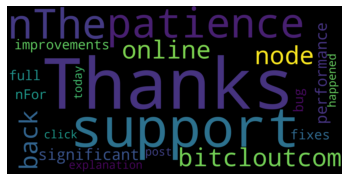

<Figure size 2160x3600 with 0 Axes>

In [66]:

# Create and generate a word cloud image:
wordcloud = WordCloud(width=1600, height=800).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()